### Real Time sound events classification from mic.



In [11]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
from keras.models import model_from_json
from sklearn.preprocessing import LabelEncoder
import IPython
import os
import pyaudio
from sklearn.metrics import mean_squared_error

In [12]:
# Loading the model:

model_path = '/Users/miguel.r/Desktop/CITSEM/Sound Event Class - DCASE/SCRIPTS Github/model_acc_87.26'

# Model reconstruction:
with open(model_path + '.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights(model_path + '.h5')

# Label Encoder:
lb = LabelEncoder()
activities = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleScream', 'femaleSpeech', 'fire', 'footsteps', 'general', 'knock', 'maleScream', 'maleSpeech', 'phone', 'piano']
lb.fit_transform(activities)  


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [13]:
# Auxiliars functions
def plotAudio(output):
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,10))
    plt.plot(output, color='blue')
    ax.set_xlim((0, len(output)))
    ax.margins(2, -0.1)
    plt.show()

def plotAudio2(output):
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
    plt.plot(output, color='blue')
    ax.set_xlim((0, len(output)))
    plt.show()

def minMaxNormalize(arr):
    mn = np.min(arr)
    mx = np.max(arr)
    return (arr-mn)/(mx-mn)

def events_predictor(X, RATE, frame_length, hop_length):
    
    clip, index = librosa.effects.trim(X, top_db=20, frame_length=frame_length, hop_length=hop_length)
    
    #Features:
    mfccs = np.array(librosa.feature.mfcc(y=X, sr=RATE, hop_length=hop_length, n_mfcc=20).T) 
    chroma = np.array(librosa.feature.chroma_stft(y=X, sr=RATE, hop_length=hop_length).T)
    # Normalize:
    mfccs_norm = minMaxNormalize(mfccs)
    chroma_norm = minMaxNormalize(chroma)
    features = np.hstack([mfccs,chroma])
    # Prediction from model
    result = model.predict(features)
    predictions = [np.argmax(y) for y in result]
    prediction = lb.inverse_transform([predictions[0]])[0]
    print('Potential event sound: ', prediction)
        
    plotAudio2(clip)
    
    return prediction

Loud sample:


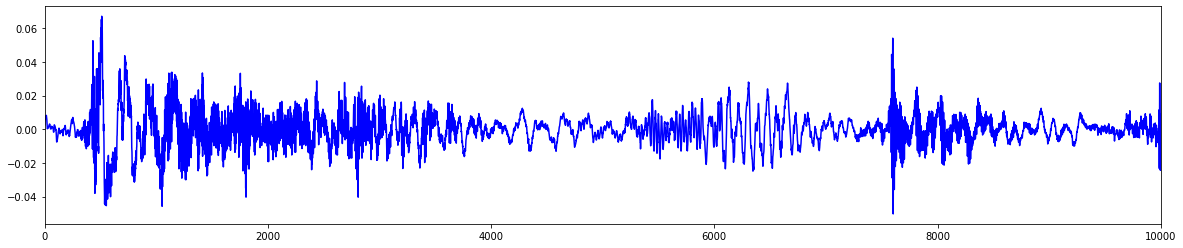

Loud threshold = 0.009648225


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  general


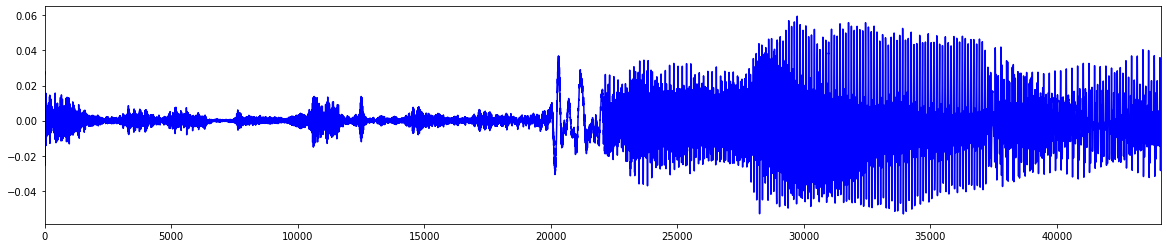

Inside LOUD reign...
Potential event sound:  piano


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


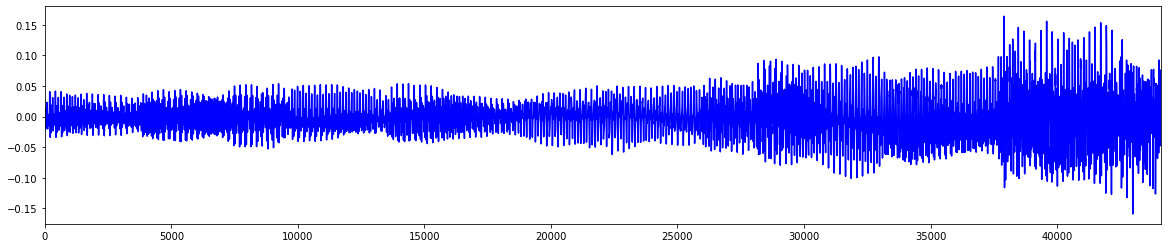

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  piano


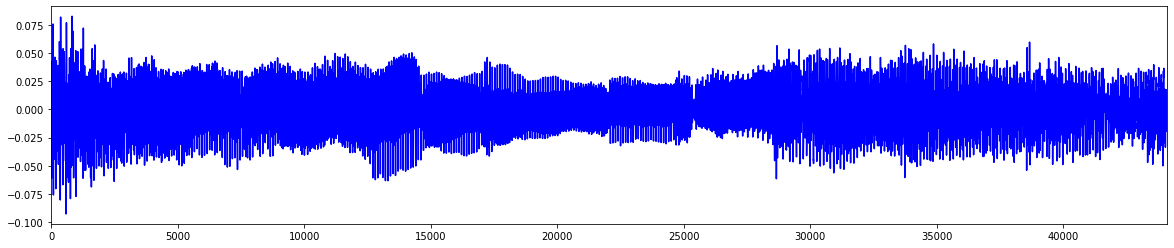

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside LOUD reign...
Potential event sound:  piano


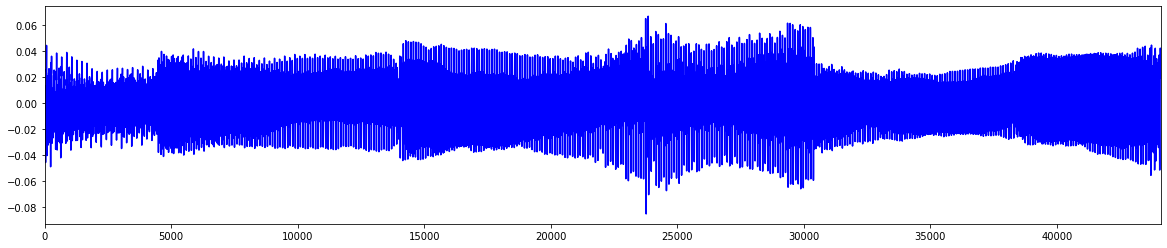

Inside LOUD reign...
Potential event sound:  general


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


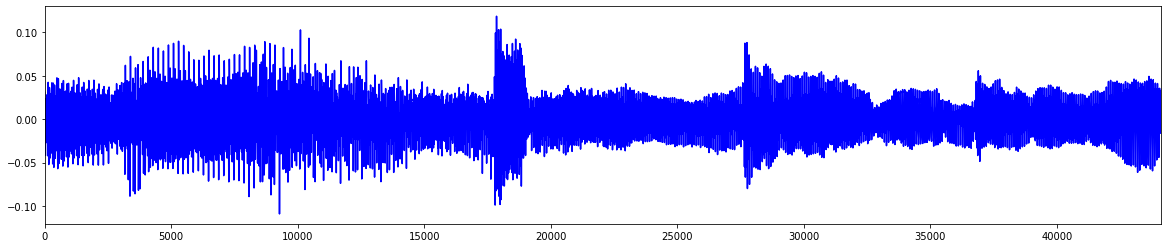

Inside LOUD reign...
Potential event sound:  piano


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


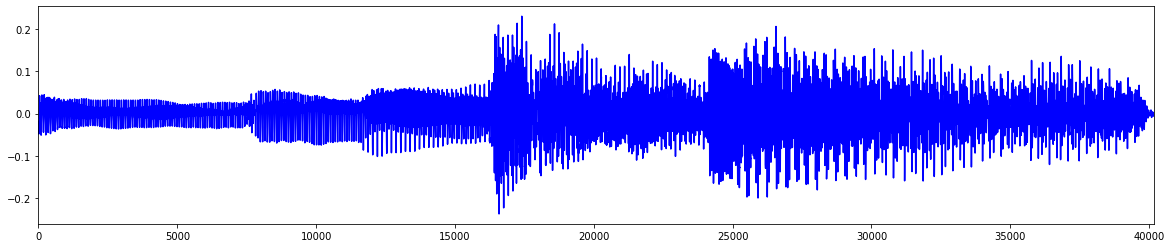

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  knock


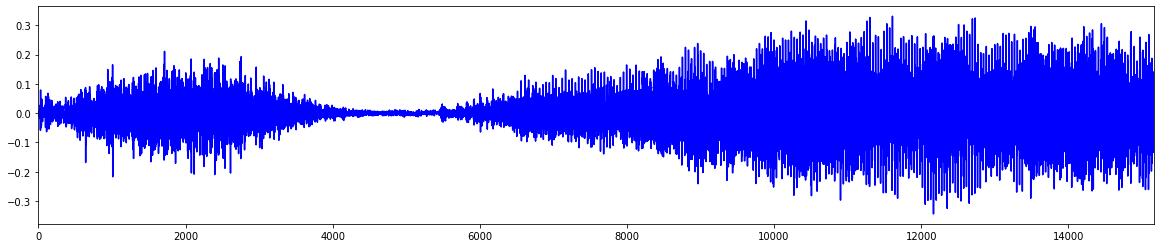

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  baby


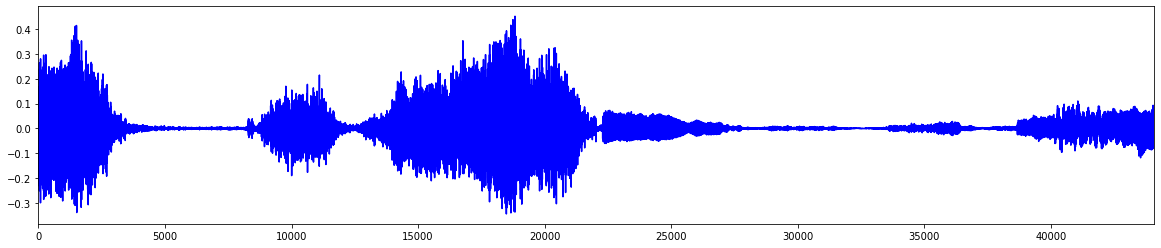

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside LOUD reign...
Potential event sound:  baby


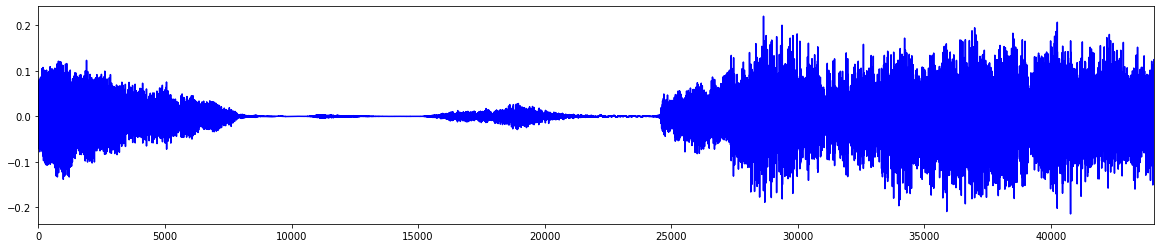

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside LOUD reign...
Potential event sound:  footsteps


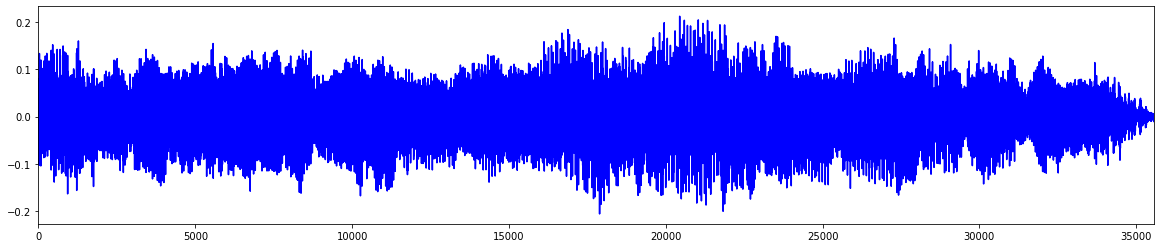

Inside LOUD reign...
Potential event sound:  general


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


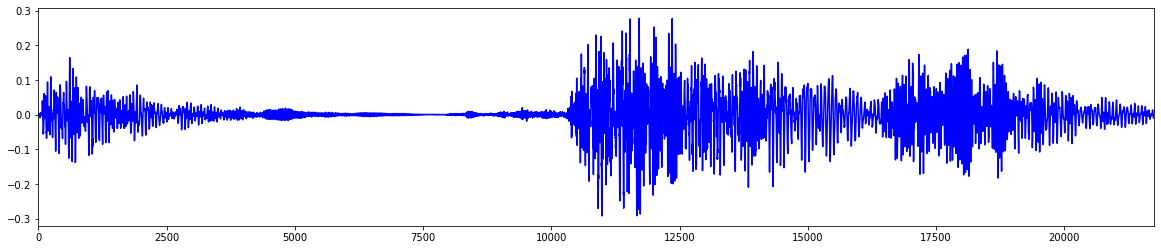

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  dog


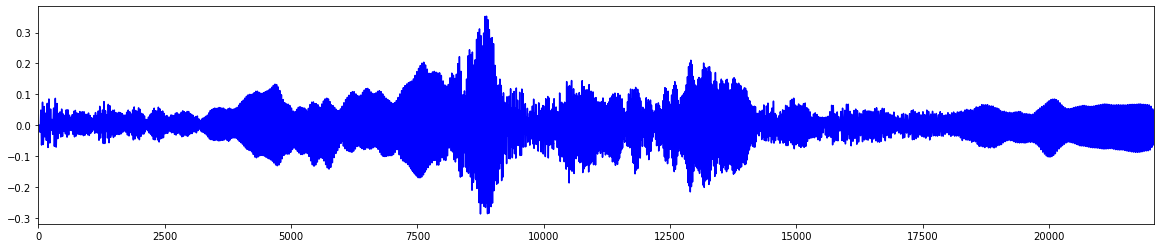

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  dog


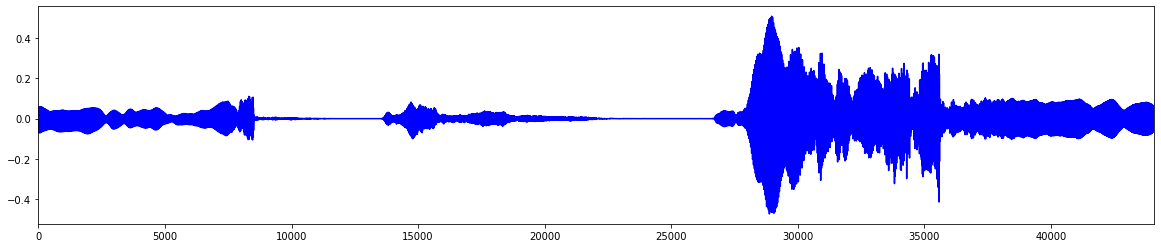

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside SILENCE reign...
Inside SILENCE reign...
Inside LOUD reign...
Potential event sound:  alarm


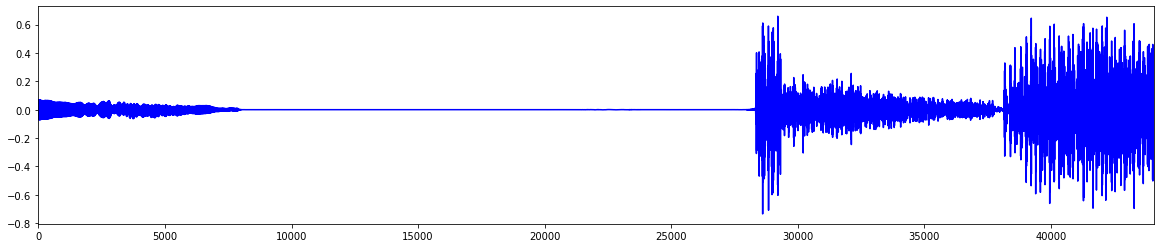

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Inside LOUD reign...
Potential event sound:  alarm


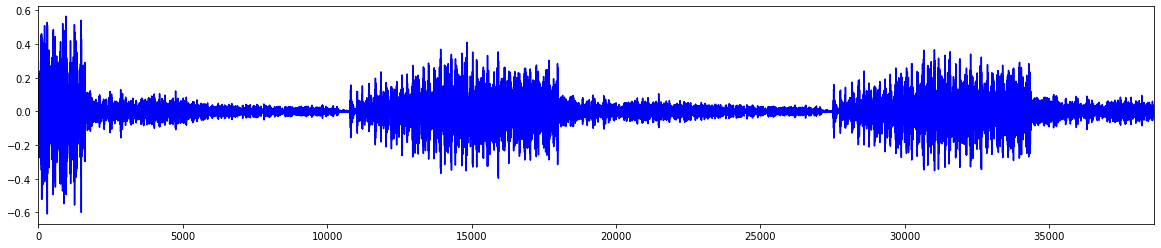

KeyboardInterrupt: 

In [14]:
# Parameters

CHUNKSIZE = 22050
RATE = 22050 # 22050 Hz of sampling rate 

# Initializing portaudio:
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

# Difining a noise window:
data = stream.read(10000, exception_on_overflow=False)
noise_sample = np.frombuffer(data, dtype=np.float32)
print("Loud sample:")
plotAudio2(noise_sample)

# Loud threshold:
loud_threshold = np.sqrt(np.mean(noise_sample**2))
# loud_threshold = np.mean(np.abs(silence_sample)) * 10 
print("Loud threshold =", loud_threshold)

audio_buffer = []


while(True):
    data = stream.read(CHUNKSIZE, exception_on_overflow=False)
    current_window = np.frombuffer(data, dtype=np.float32)

    # Reducing noise:
    current_window = nr.reduce_noise(audio_clip=current_window, noise_clip=noise_sample, verbose=False)

    if(audio_buffer==[]):
        audio_buffer = current_window
        
    else:
        if(np.mean(np.abs(current_window))<loud_threshold):
            print('Inside SILENCE reign...')

        else:
            print("Inside LOUD reign...")
            audio_buffer = np.concatenate((audio_buffer,current_window))
            prediction = events_predictor(np.array(audio_buffer), RATE, 512, 256)
            audio_buffer = [] # Buffer reboot


# Closing Stream:
stream.stop_stream()
stream.close()
p.terminate()
